# Data Importing and Cleaning

Importing the relevant libraries, could import all the basic libraries using one command using the pyforest library. 

In [1]:
import pyforest
import warnings
warnings.filterwarnings("ignore")

Importing the raw csv files

In [2]:
order_data=pd.read_csv('orders.csv')
restaurants_data=pd.read_csv('rest.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Checking whether restaurant_id is the primary key in the restaurant table - Unique number of restaurant_id's in order table equals the number of rows on the restaurant table.

In [3]:
print(order_data.restaurant_id.nunique())
print(restaurants_data.restaurant_id.nunique())

1697
1697


Merging the 'customerdata' and 'restaurant' dataframe on the 'restaurant_id' column

In [4]:
order_data=pd.merge(order_data, restaurants_data, on = ['restaurant_id'])

<IPython.core.display.Javascript object>

Checking the data types of the features

In [5]:
order_data.dtypes

order_acknowledged_at     object
order_ready_at            object
order_value_gbp          float64
restaurant_id              int64
number_of_items            int64
prep_time_seconds          int64
country                   object
city                      object
type_of_food              object
dtype: object

Checking the data-type of the 'order_acknowledged_at' column - this is a str object and needs to be changed to a datetime object

In [6]:
type(order_data['order_acknowledged_at'][0])

str

Converting the date columns from the 'str' format to a date-time format

In [7]:
order_data['order_acknowledged_at']=pd.to_datetime(order_data['order_acknowledged_at'],utc=True)
order_data['order_ready_at']=pd.to_datetime(order_data['order_ready_at'],utc=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Verifying the data format of the 'order_acknowledged_at' column after the formatting

In [8]:
type(order_data['order_acknowledged_at'][0])

pandas._libs.tslibs.timestamps.Timestamp

Sorting the data frame in a chronological order based on the order time.

In [9]:
order_data=order_data.sort_values(by='order_acknowledged_at')
order_data.reset_index(inplace=True)
order_data.drop(columns=['index'],inplace=True)

Extracting the date of the order from the date-time column -'order_acknowledged_at'

In [10]:
order_data['order_date']=pd.to_datetime(order_data['order_acknowledged_at'], utc=True,
                                         format='%Y-%m-%d %H:%M:%S').dt.date
order_data['order_date']=pd.to_datetime(order_data['order_date'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Extracting the hour of the order from the date-time column - 'order_acknowledged_at'

In [11]:
order_data['order_ack_hour']=pd.to_datetime(order_data['order_acknowledged_at'], utc=True,
                                     format='%Y-%m-%d %H:%M:%S').dt.hour

<IPython.core.display.Javascript object>

Extracting the hour from the date-time column - 'order_ready_at'

In [12]:
order_data['order_ready_hour']=pd.to_datetime(order_data['order_ready_at'], utc=True,
                                     format='%Y-%m-%d %H:%M:%S').dt.hour

<IPython.core.display.Javascript object>

Extracting the day of the order

In [13]:
order_data['DAY'] = order_data['order_date'].dt.day_name()

Extracting the day number when the order was placed

In [14]:
order_data['DAY_NUMBER']=order_data['order_date'].dt.dayofweek

Re-arranging the columns of the dataframe

In [15]:
order_data=order_data[['order_date','country','city','restaurant_id','type_of_food','order_acknowledged_at',
                             'order_ack_hour','DAY','DAY_NUMBER','order_ready_at','order_ready_hour',
                              'number_of_items','order_value_gbp','prep_time_seconds']]

# EDA - Exploratory Data Analysis
The business perspective for each analysis has been provided in the pdf file

Analysis: Order counts by the hour 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

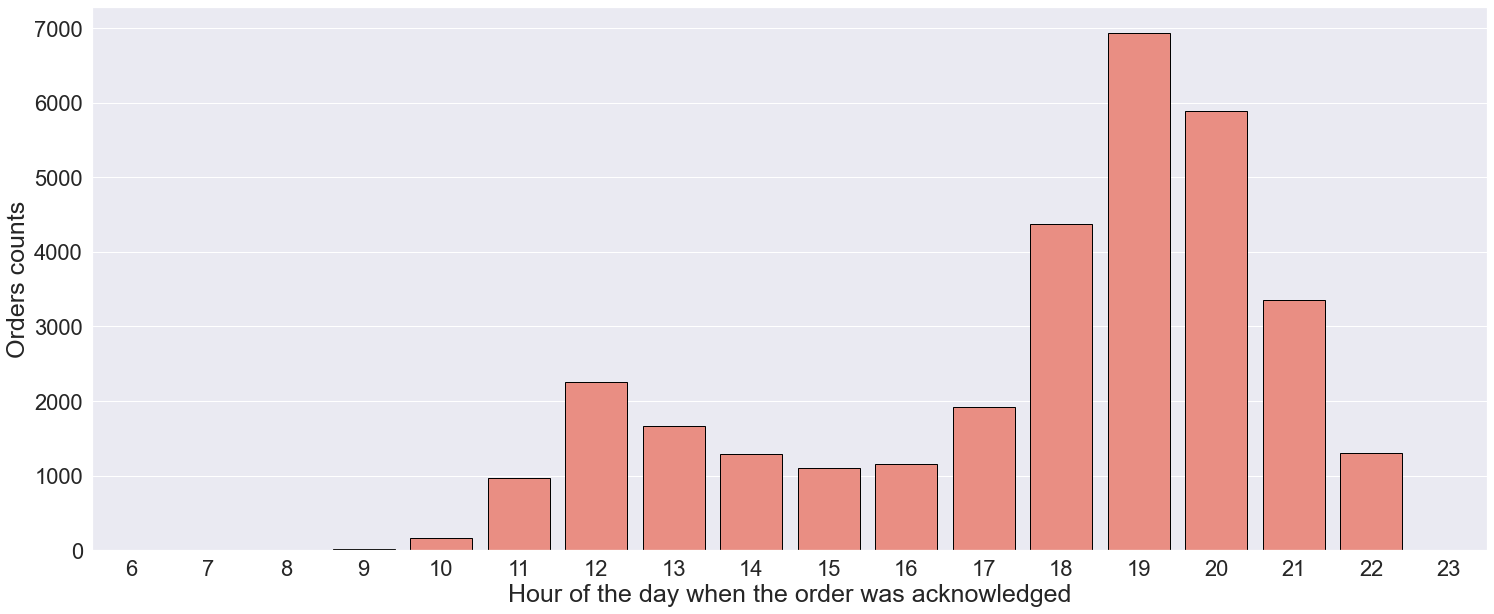

In [16]:
# Code : 
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
hourly_orders=order_data.groupby('order_ack_hour').count()['order_acknowledged_at']
hourly_orders=pd.DataFrame(hourly_orders)
sns.barplot(x=hourly_orders.index, y=hourly_orders['order_acknowledged_at'],color='salmon',edgecolor='black')
plt.xlabel('Hour of the day when the order was acknowledged',fontsize=25)
plt.ylabel('Orders counts',fontsize=25);

Observation- Most orders are placed between 6:00 pm to 9:00 pm. 

It is imperative to realize when DELIVEROO receives most requests for food delivery as they would like more delivery partners on the road to serve its customers during these peak hours.

Analysis: Count of orders based on the countries

In [17]:
order_countries=pd.DataFrame(order_data.groupby('country').count()['order_date'].sort_values())
order_countries['percent']=order_countries['order_date']/order_countries['order_date'].sum()*100

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

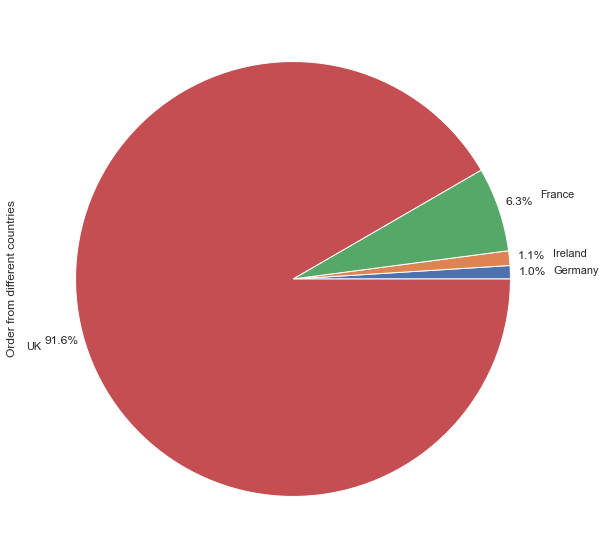

In [18]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 1.0)
order_countries['percent'].plot.pie(autopct='%1.1f%%',pctdistance=1.1, labeldistance=1.2)
plt.ylabel('Order from different countries');

Observation : It can be seen that UK has the lion's share of Deliveroo orders

Analysis: Distribution of transactions from each cities

In [19]:
count_cities=pd.DataFrame(order_data.groupby('city').count()['order_value_gbp'])
count_cities['percent'] = (count_cities['order_value_gbp'] / count_cities['order_value_gbp'].sum()) * 100
percent_transactions=pd.DataFrame(count_cities['percent'])
percent_transactions.sort_values(by='percent');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

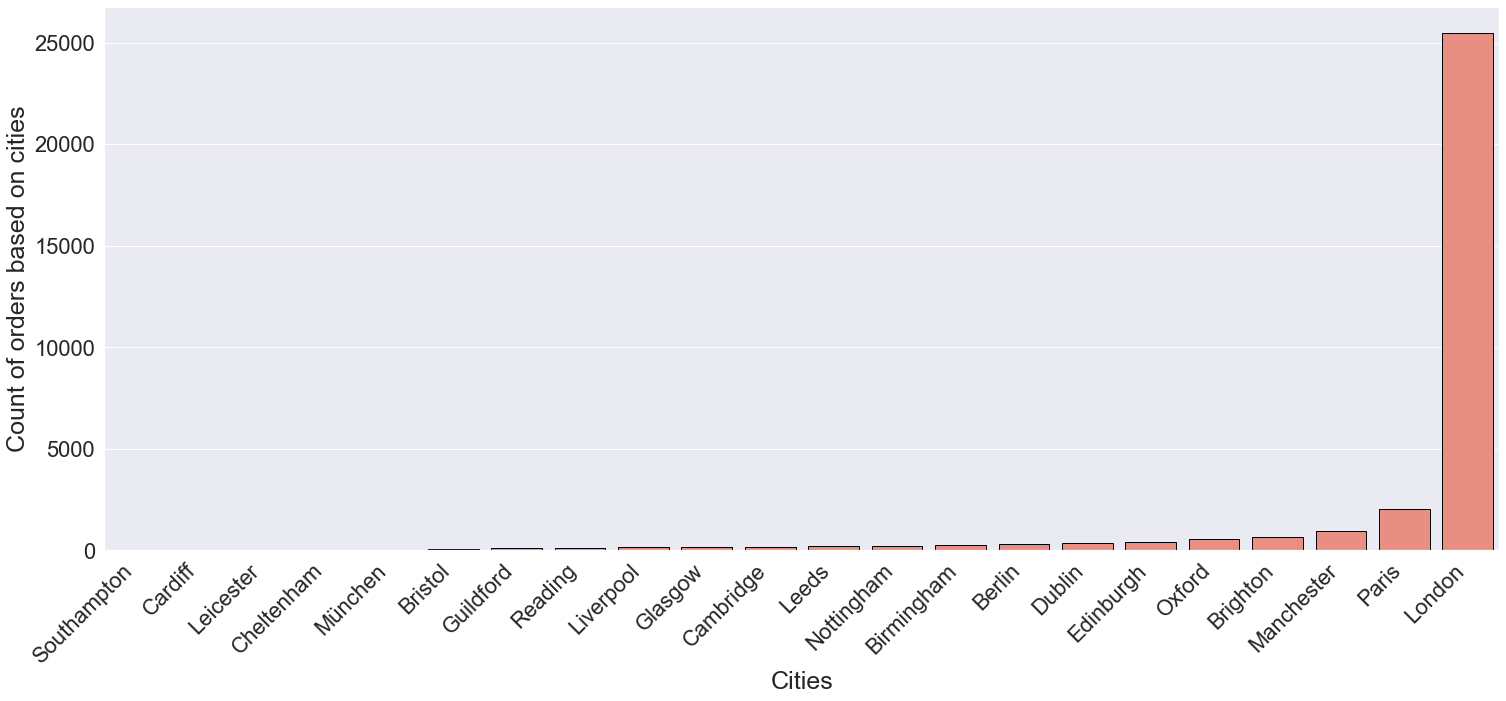

In [20]:
mean_order_price=pd.DataFrame(order_data.groupby('city').count()['order_value_gbp']).sort_values(by='order_value_gbp')
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
sns.barplot(x=mean_order_price.index, y=mean_order_price['order_value_gbp'],color='salmon',edgecolor='black')
plt.xlabel('Cities',fontsize=25)
plt.ylabel('Count of orders based on cities',fontsize=25);
plt.xticks(rotation=45, ha='right');

Observation : 78% of the transactions are only from London

Analysis: Distribution of cuisine that has been ordered 

In [21]:
count_cities=pd.DataFrame(order_data.groupby('type_of_food').count()['order_value_gbp'])
count_cities['percent'] = (count_cities['order_value_gbp'] / count_cities['order_value_gbp'].sum()) * 100
percent_transactions=pd.DataFrame(count_cities['percent'])
percent_transactions.sort_values(by='percent');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

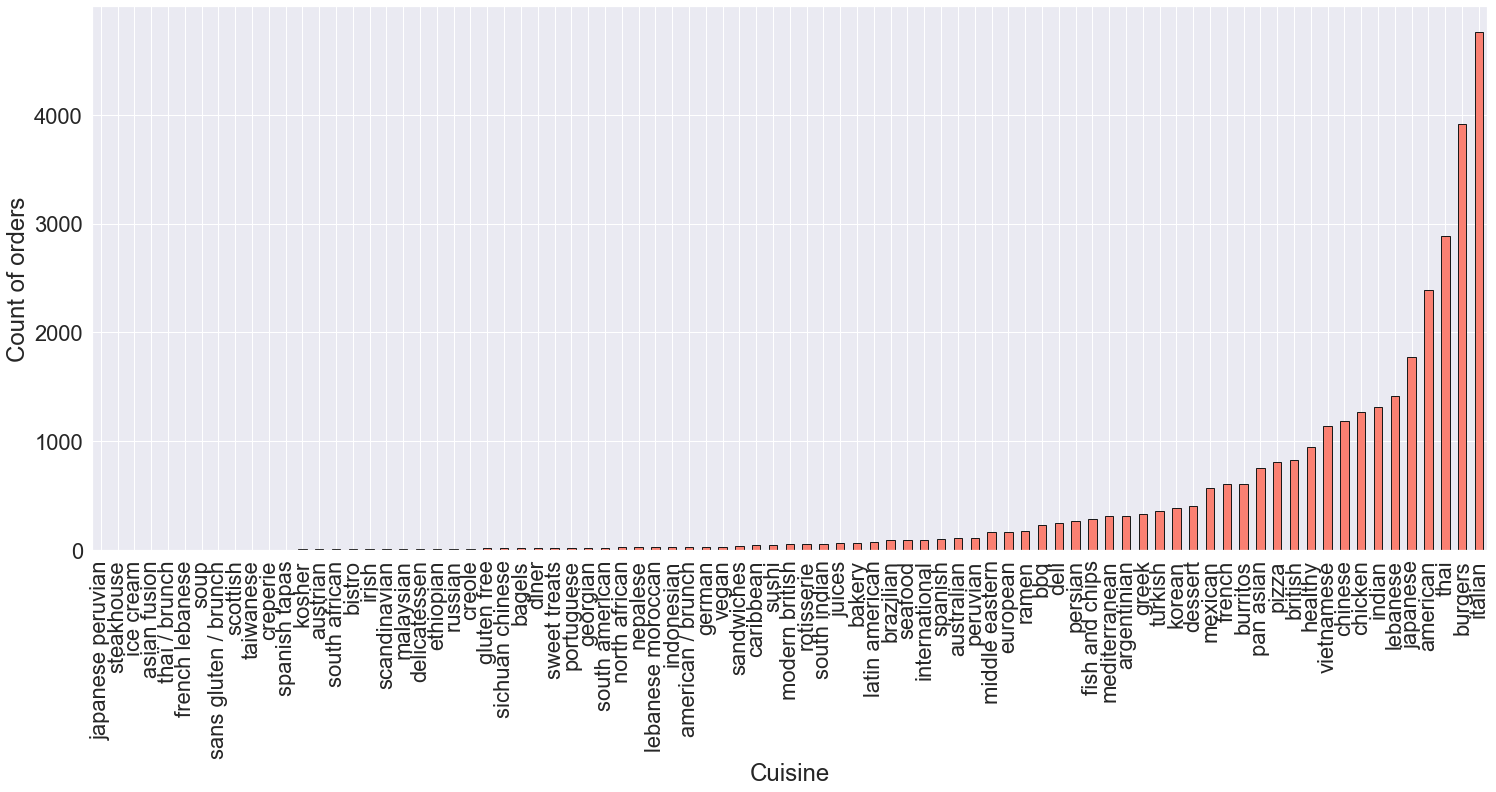

In [22]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
order_data.groupby('type_of_food').count()['order_value_gbp'].sort_values().plot(kind='bar',color='salmon',edgecolor='k');
plt.xlabel('Cuisine')
plt.ylabel('Count of orders');

Observation : Italian,burgers,thai,american and japanese has been ordered the most, accounts for almost 50% of the total count of orders.

 Analysis: Mean order-values in GBP based on the cities from different countries.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

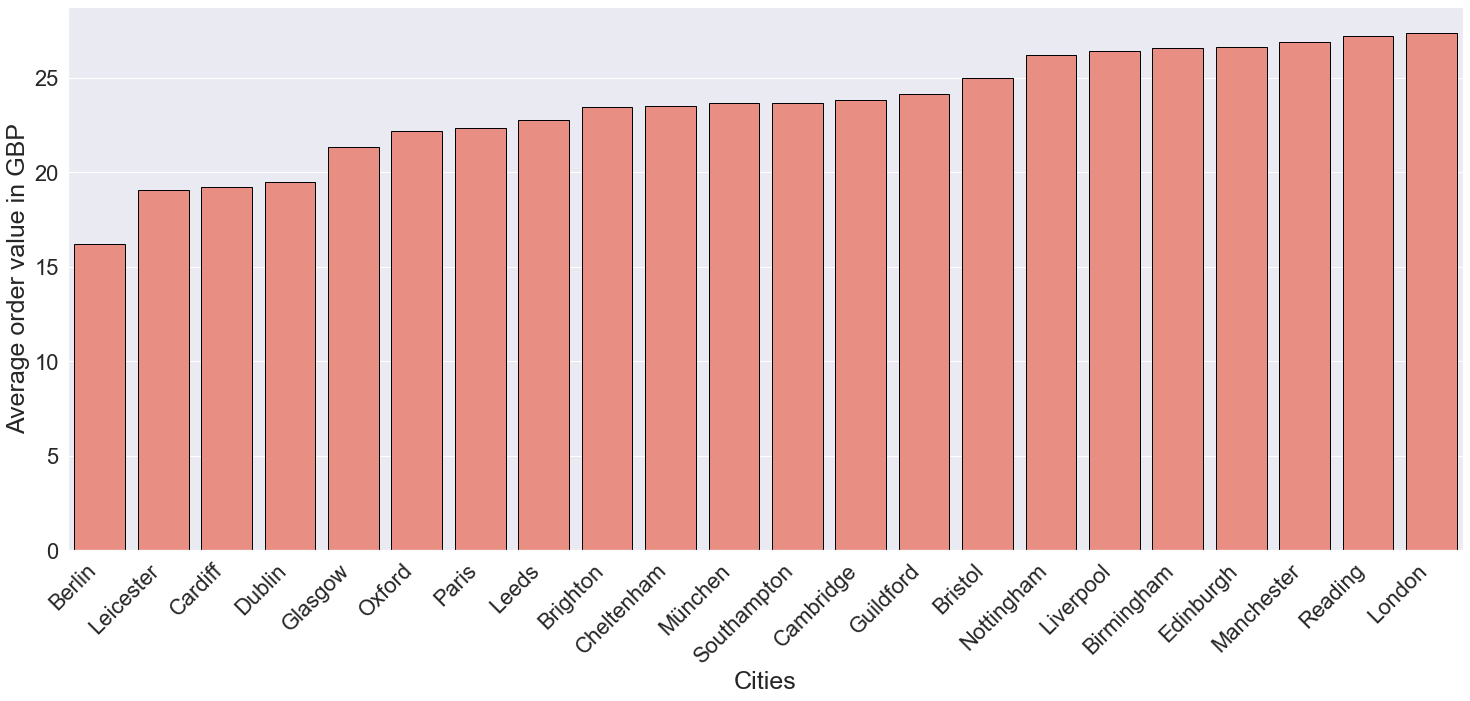

In [23]:
# Code :
mean_order_price=pd.DataFrame(order_data.groupby('city').mean()['order_value_gbp']).sort_values(by='order_value_gbp')
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
sns.barplot(x=mean_order_price.index, y=mean_order_price['order_value_gbp'],color='salmon',edgecolor='black')
plt.xlabel('Cities',fontsize=25)
plt.ylabel('Average order value in GBP',fontsize=25);
plt.xticks(rotation=45, ha='right');

Observation :  Berlin has the least average order value while London has the most. One of the reasons for this is the fact that orders in Berlin are charged in Euros which has lower exchange rates than in London. So for similar food, customers are supposed to pay less in other countries than in the UK. 
Also, cities in UK such as London, Manchester, Liverpool are more expensive than other metropolitan cities from other countries.

Analysis: Distribution of Order values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

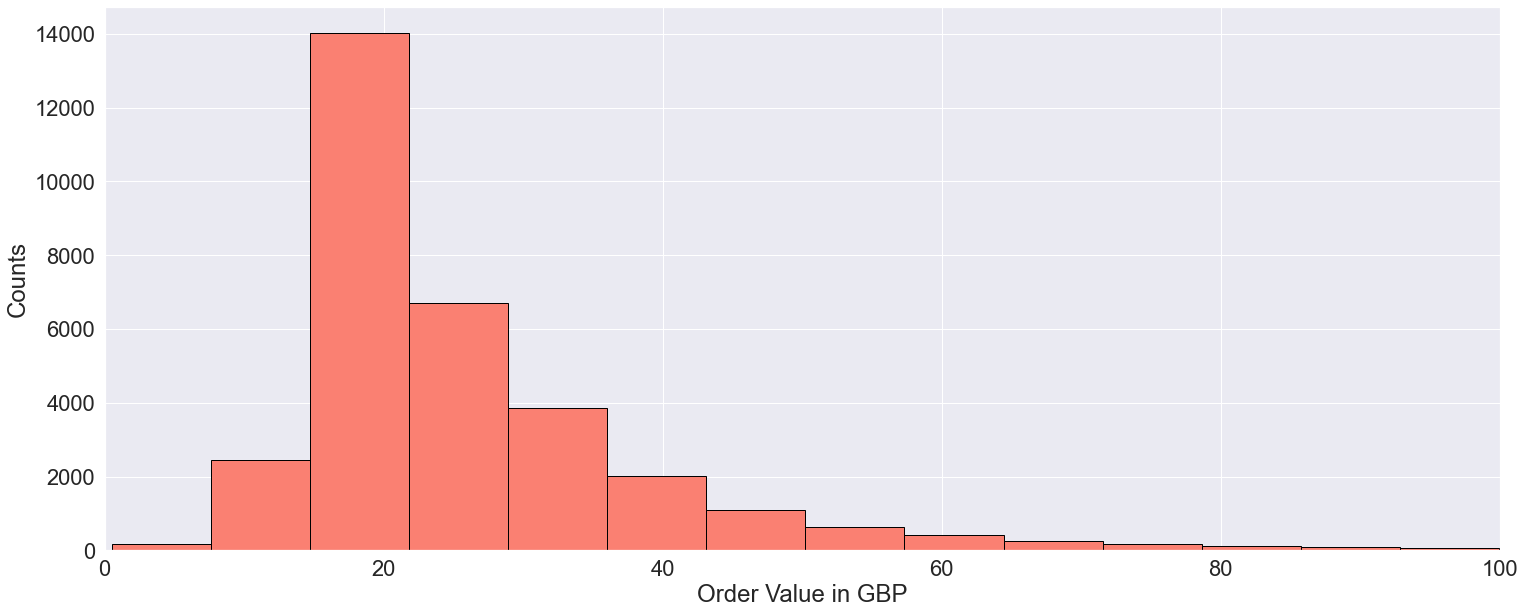

In [24]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.hist(order_data['order_value_gbp'],bins=100,color='salmon',edgecolor='black');
plt.xlim(0,100)
plt.ylabel('Counts')
plt.xlabel('Order Value in GBP');

Observation : The majority of the order values ranges between 10-40 GBP.

Average price per item :-


Create a new column 'price per item' in order to bucket the restaurants based on food prices based on the following buckets : 

£10 and under - Inexpensive | £10 to £25 - Moderately Expensive | £25 - £45 - Expensive | £45 and over - Very Expensive


Hypothesis : There is a relationship between average food price and the time the restaurent takes to prepare the food

In [25]:
order_data['price_per_item']=round(order_data['order_value_gbp']/order_data['number_of_items'],1)

In [26]:
# Making a new column 'price_range'

conditions_prices = [
    (order_data['price_per_item'] > 0) & (order_data['price_per_item'] < 10),
    (order_data['price_per_item'] >= 10) & (order_data['price_per_item'] < 25),
    (order_data['price_per_item'] >= 25) & (order_data['price_per_item'] < 45),
    (order_data['price_per_item'] >=45)]

# create a list of the values we want to assign for each condition
values = ['Inexpensive', 'Moderately Expensive', 'Expensive', 'Very Expensive']
order_data['price_range'] = np.select(conditions_prices, values)

<IPython.core.display.Javascript object>

Analysis: Preparation time of food in hours based on the price range of restaurants

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

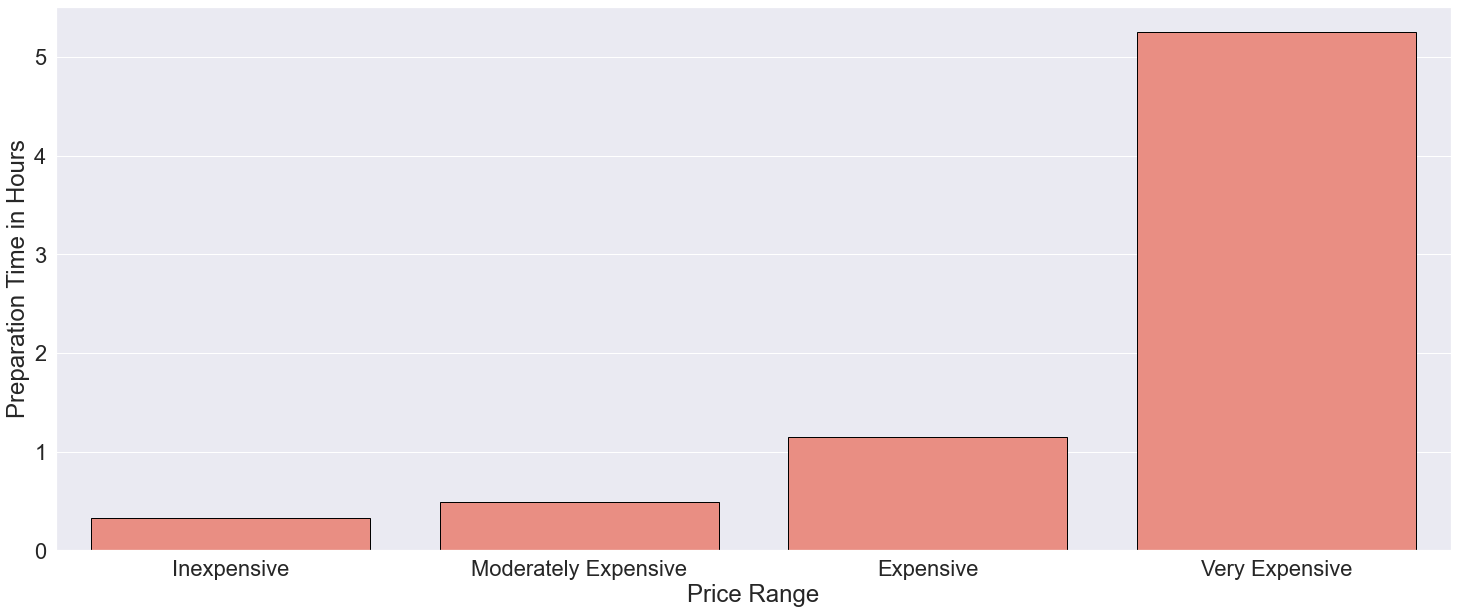

In [27]:
price_range=pd.DataFrame(order_data.groupby('price_range').mean()['prep_time_seconds']).sort_values(by='prep_time_seconds')
price_range['Time_in_hours']=price_range['prep_time_seconds']/3600
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
sns.barplot(x=price_range.index, y=price_range['Time_in_hours'],color='salmon',edgecolor='black')
plt.xlabel('Price Range')
plt.ylabel('Preparation Time in Hours');

Observation : We see that the more expensive the restaurant is, the more time it takes to prepare the food.

Analysis: Created a bucket based on the hour of order

In [28]:
# Making a new column 'time_bucket'

conditions_shift = [
    (order_data['order_ack_hour'] > 0) & (order_data['order_ack_hour'] < 6),
    (order_data['order_ack_hour'] >= 6) & (order_data['order_ack_hour'] < 12),
    (order_data['order_ack_hour'] >=12) & (order_data['order_ack_hour'] < 18),
    (order_data['order_ack_hour'] >=18) & (order_data['order_ack_hour'] < 24)]

# create a list of the values we want to assign for each condition
values = ['Night_shift', 'Morning', 'Afternoon', 'Evening']
order_data['time_bucket'] = np.select(conditions_shift, values)

<IPython.core.display.Javascript object>

Preparation time of food in hours based on the price range of restaurants.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

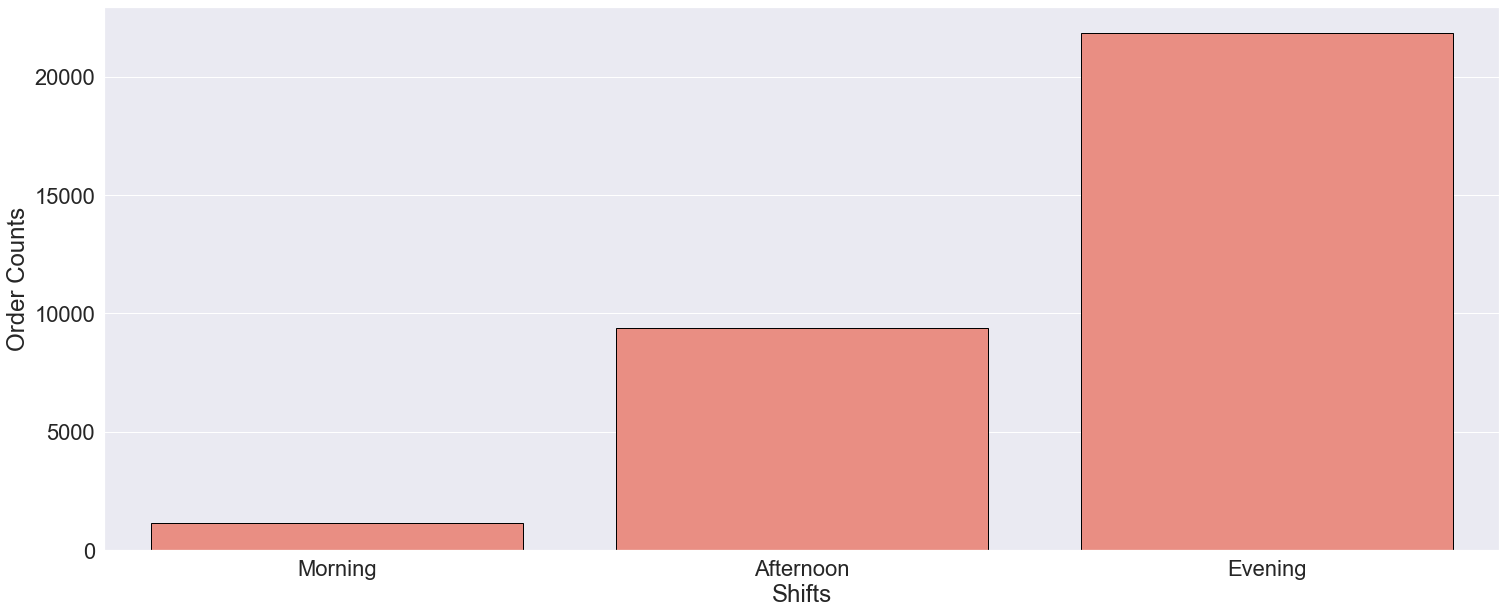

In [29]:
ordercounts=pd.DataFrame((order_data.groupby('time_bucket').count())['order_date'].sort_values())
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
sns.barplot(x=ordercounts.index, y=ordercounts['order_date'],color='salmon',edgecolor='black')
plt.xlabel('Shifts')
plt.ylabel('Order Counts');

Observation : The maximum number of orders are placed in the Evening.

Analysis: Average food preparation time based on the shifts in the day

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

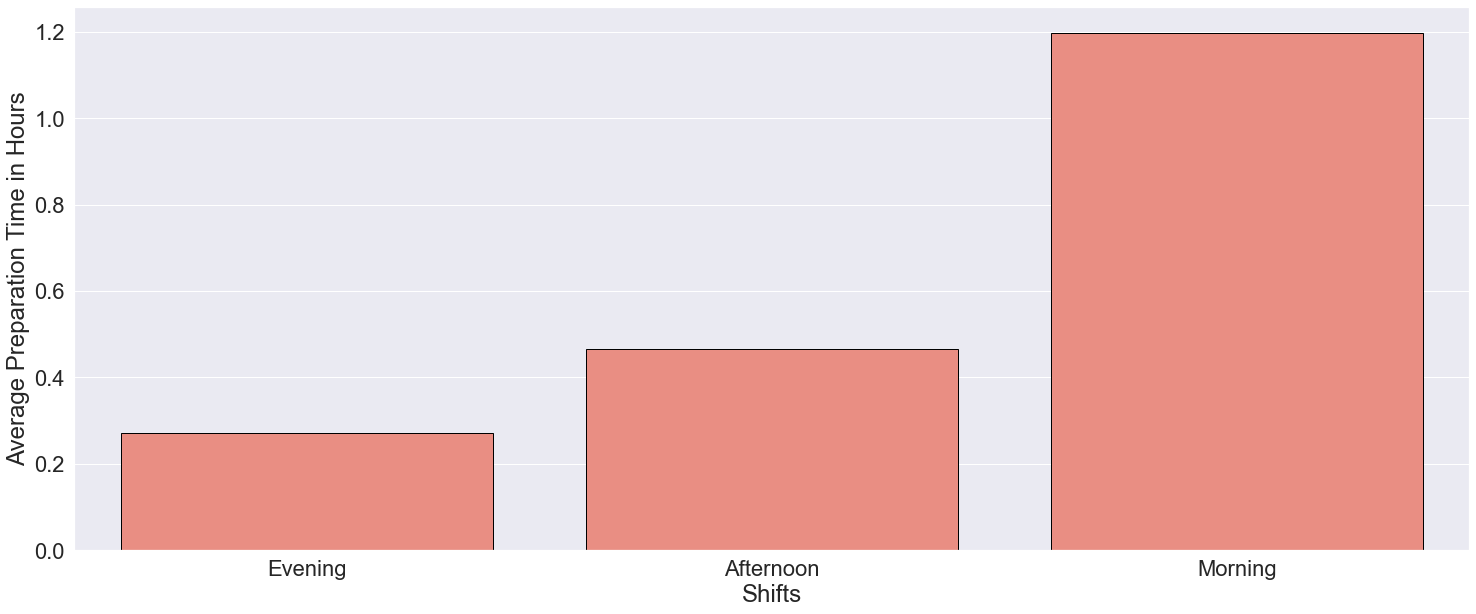

In [30]:
shifts=pd.DataFrame(order_data.groupby('time_bucket').mean()['prep_time_seconds']).sort_values(by='prep_time_seconds')
shifts['Time_in_hours']=shifts['prep_time_seconds']/3600
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
sns.barplot(x=shifts.index, y=shifts['Time_in_hours'],color='salmon',edgecolor='black')
plt.xlabel('Shifts')
plt.ylabel('Average Preparation Time in Hours');


Observation : Even though we see that majority of the orders are placed in the evening, orders placed in the morning take more time to prepare. This might be because of less chefs available in the morning.

Analysis: Counts of orders based on the day of the week

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

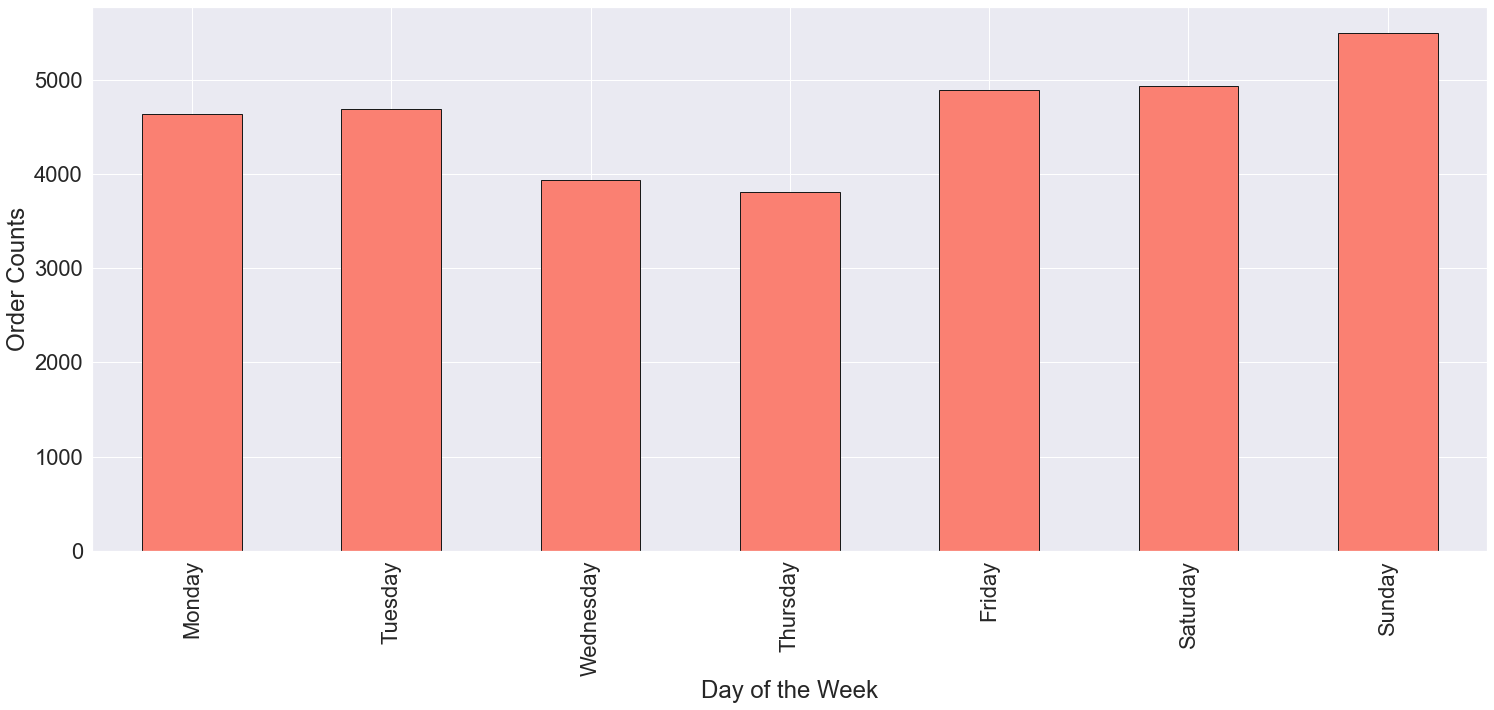

In [31]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
order_data.groupby('DAY').count().reindex(cats)['order_date'].plot(kind='bar',color='salmon',edgecolor='k')
plt.xlabel('Day of the Week')
plt.ylabel('Order Counts');

Observation: Saturdays and Sundays have the highest order counts in a week

Analysis: Average food preparation time based on the day of the week

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

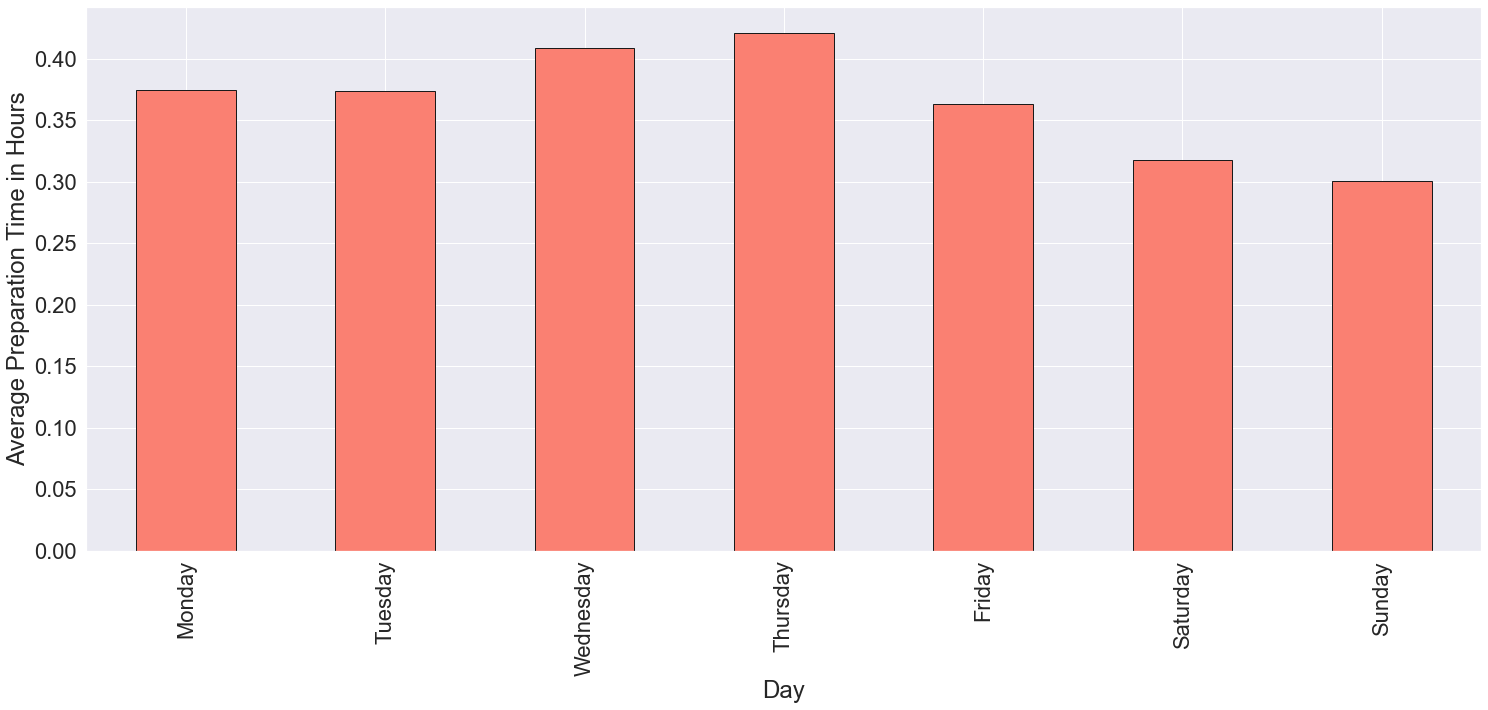

In [32]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
time_vs_day=order_data.groupby('DAY').mean().reindex(cats)
time_vs_day['Time_in_hours']=time_vs_day['prep_time_seconds']/3600
time_vs_day['Time_in_hours'].plot(kind='bar',color='salmon',edgecolor='k')
plt.xlabel('Day')
plt.ylabel('Average Preparation Time in Hours');

Observation :Sundays and Saturdays have the least food preparation time, probably restaurents hire extra chefs to mitigate the extra demand on the weekends. 

Analysis: Heatmap to checkout the corelation between different features of the data-set

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

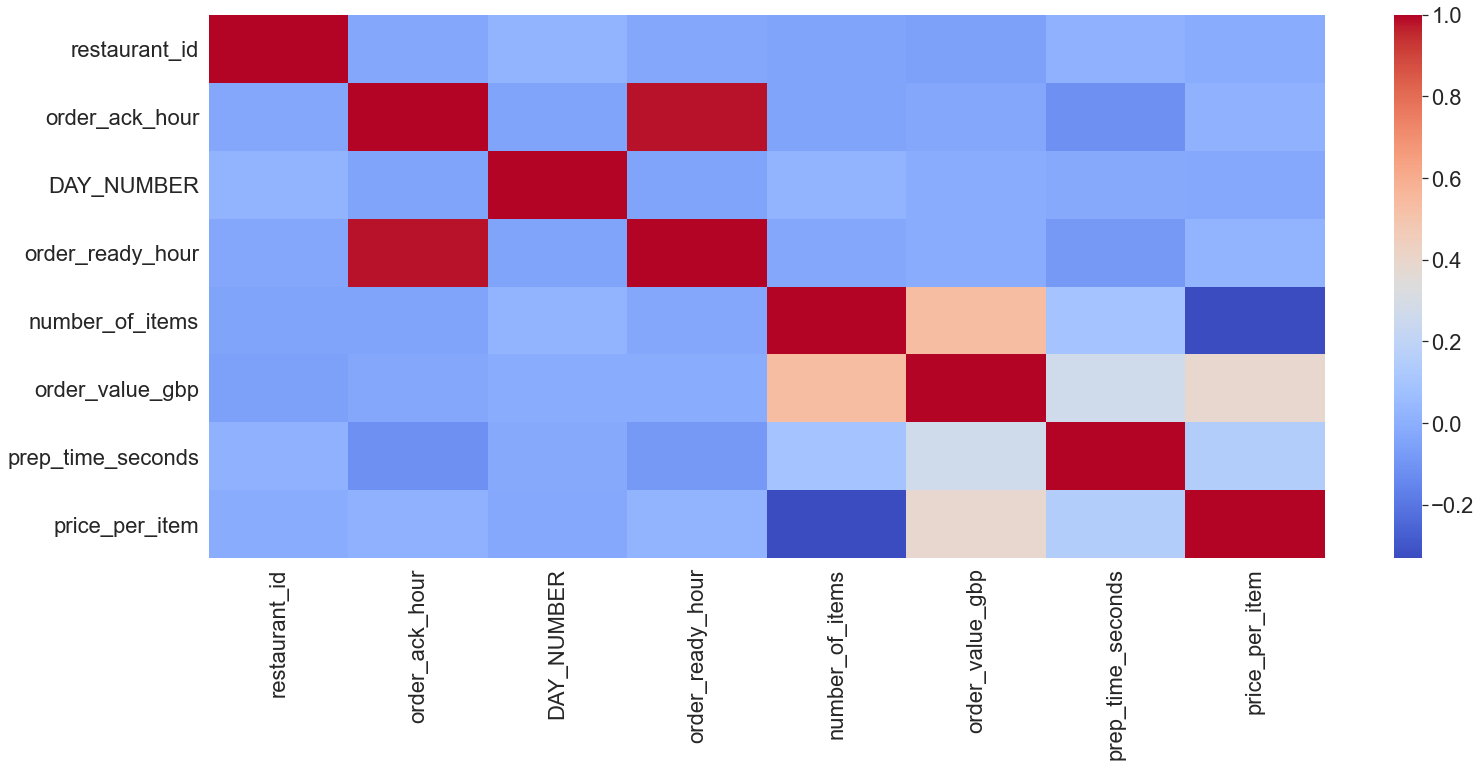

In [33]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
sns.heatmap(order_data.corr(),cmap='coolwarm');

Observation : The order value in gbp has a correlation with price_per_item. 
Let us consider a small example to explain this : A customer orders a pizza which costs £10. So the price per item for such an order is 10. Now if another customer orders the same pizza and adds a bottle of coca-cola for £2, the price per item goes to £6. This correlation can be explained from the heatmap.

Another strong correlation can be seen between order_value and number of items ordered which is very intuitive.

Analysis: Distribution of food preparation time

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

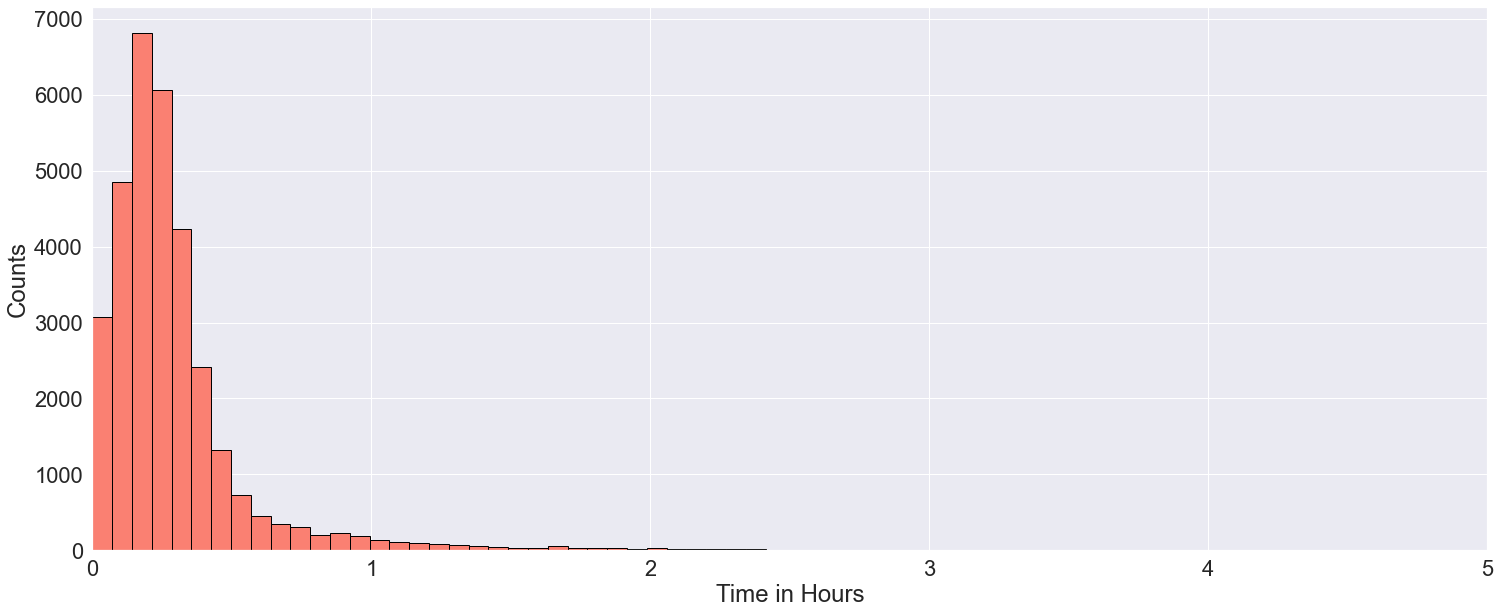

In [34]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
prep_time=pd.DataFrame(order_data['prep_time_seconds']/3600)
plt.hist(prep_time,bins=1000,color='salmon',edgecolor='black');
plt.xlim(0,5);
plt.xlabel("Time in Hours")
plt.ylabel("Counts");

Observation :  Majority of the orders are being prepared within an hour

Analysis: Average time for food preparation time based on cities

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

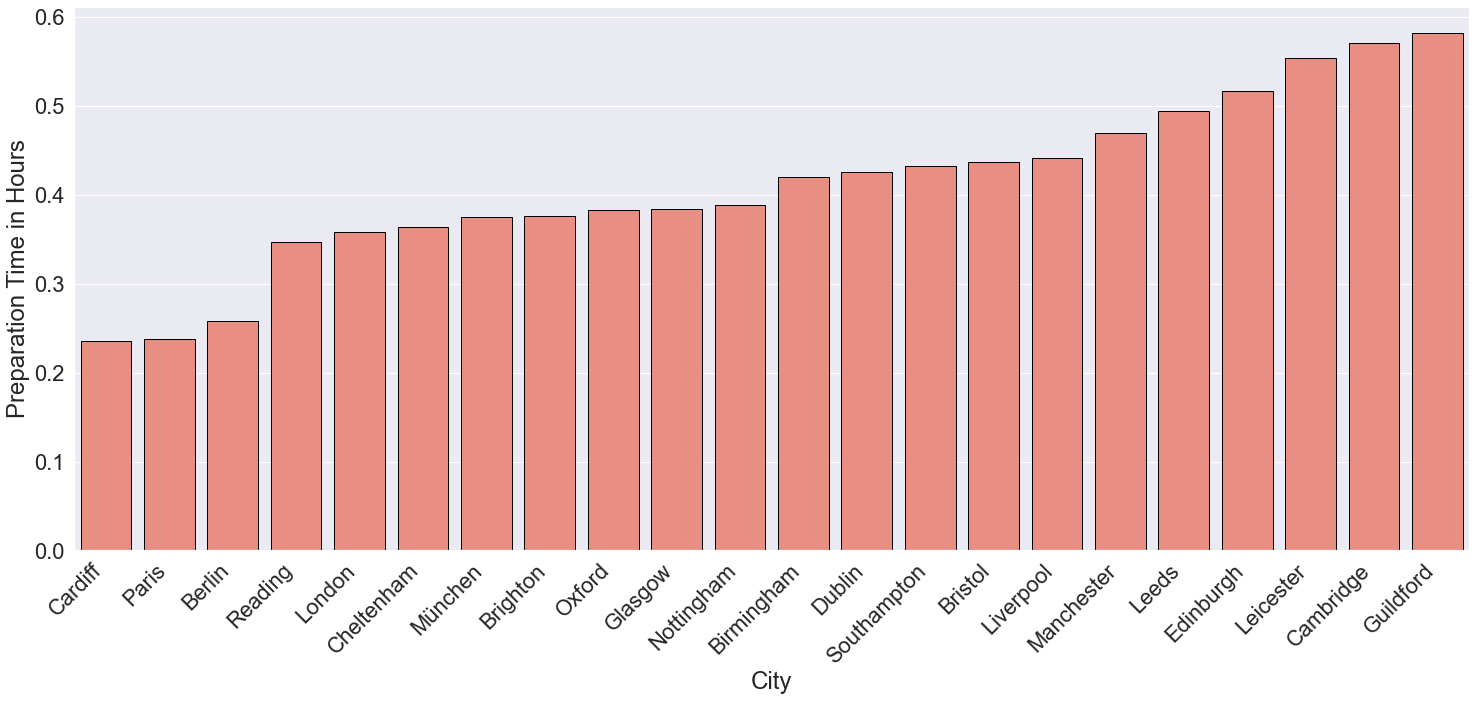

In [35]:
time_vs_city=pd.DataFrame(order_data.groupby('city').mean()['prep_time_seconds']).sort_values(by='prep_time_seconds')
time_vs_city['Time_in_hours']=time_vs_city['prep_time_seconds']/3600
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
sns.barplot(x=time_vs_city.index, y=time_vs_city['Time_in_hours'],color='salmon',edgecolor='black')
plt.xlabel('City')
plt.ylabel('Preparation Time in Hours')
plt.xticks(rotation=45, ha='right');

Observation : Restaurants in outskirts of metropolitan cities take longer time to prepare food.

Analysis: Average food preparation time based on the countries 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

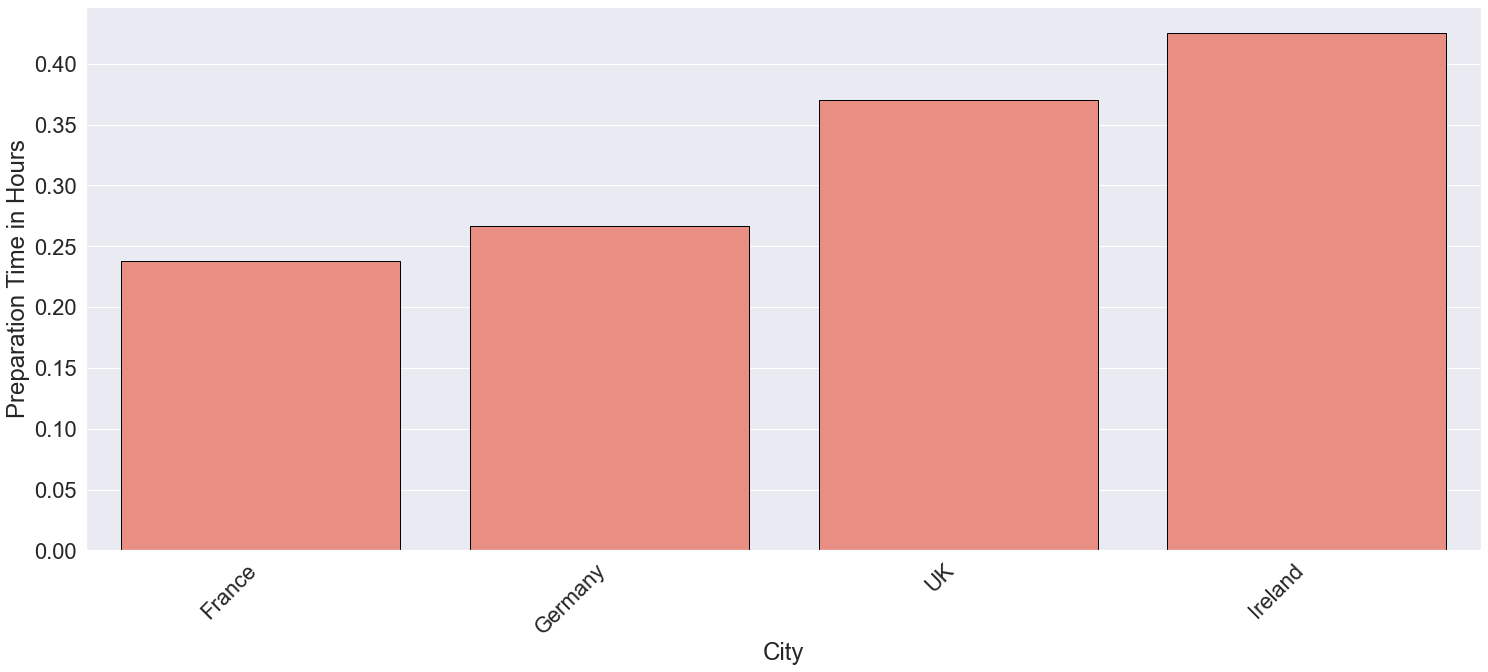

In [36]:
time_vs_country=pd.DataFrame(order_data.groupby('country').mean()['prep_time_seconds']).sort_values(by='prep_time_seconds')
time_vs_country['Time_in_hours']=time_vs_country['prep_time_seconds']/3600
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
sns.barplot(x=time_vs_country.index, y=time_vs_country['Time_in_hours'],color='salmon',edgecolor='black')
plt.xlabel('City')
plt.ylabel('Preparation Time in Hours')
plt.xticks(rotation=45, ha='right');

Observation : Average food preparation time in Ireland is highest among the other countries

Analysis: Time required to prepare different types of food

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

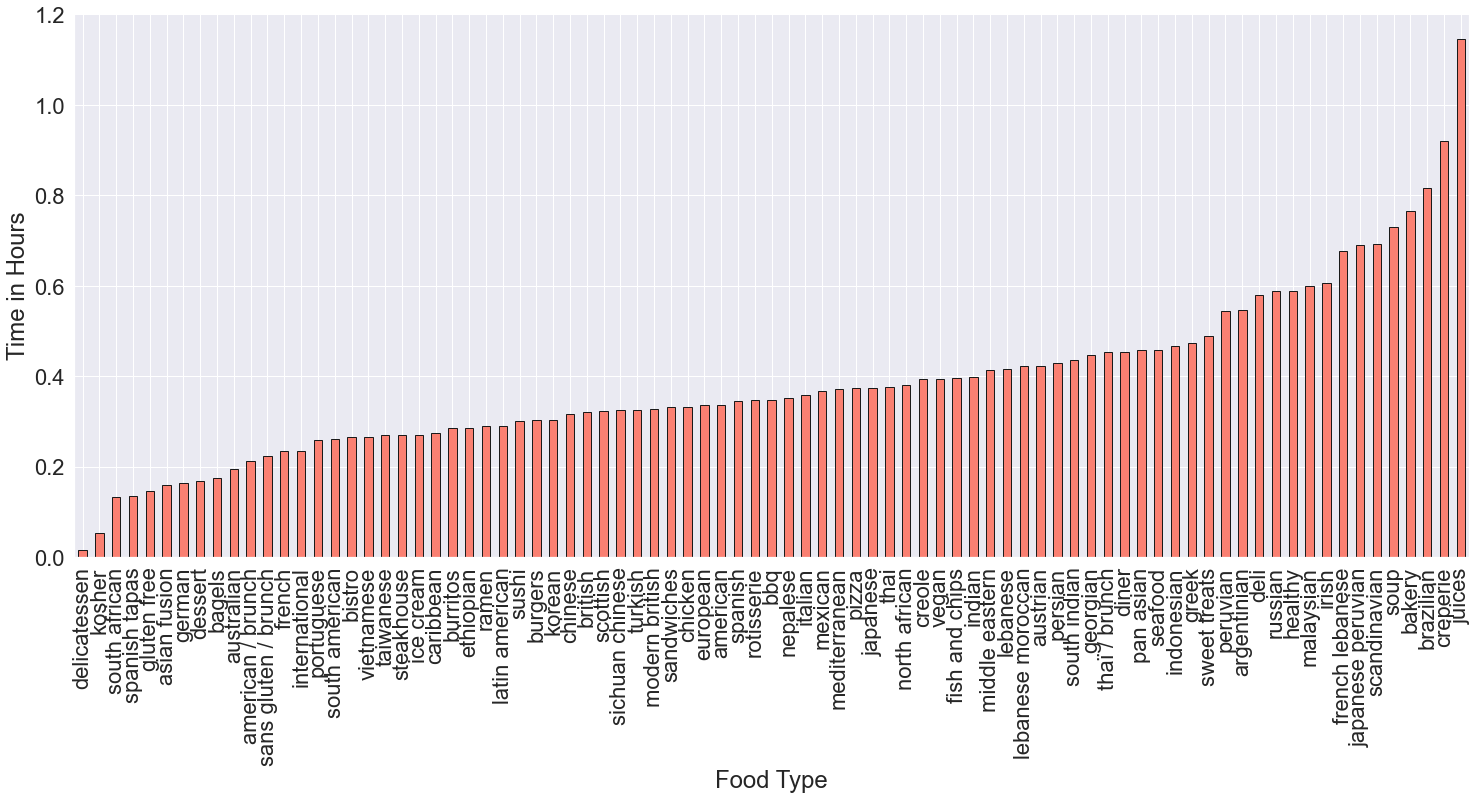

In [37]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
orders_vs_time=pd.DataFrame(order_data.groupby('type_of_food').mean()['prep_time_seconds']).sort_values(by='prep_time_seconds')
orders_vs_time['Time in Hours']=orders_vs_time['prep_time_seconds']/3600
orders_vs_time['Time in Hours'].plot(kind='bar',color='salmon',edgecolor='k');
plt.xlabel('Food Type')
plt.ylabel('Time in Hours');

Observation : As it appears from the data that Juices require the most time to prepare. This looks like a bit of anomaly. This is because of few juice orders that took a long time to prepare as evident from the data.

# Machine Learning

# One Hot Encoding for Time_Bucket, Price and Country 

In [38]:
all_data = pd.concat( [order_data, pd.get_dummies(order_data.time_bucket, prefix = 'Time_bucket') ] , axis = 1)
all_data = pd.concat( [all_data, pd.get_dummies(all_data.price_range, prefix = 'Price') ] , axis = 1)
all_data = pd.concat( [all_data, pd.get_dummies(all_data.country, prefix = 'Country') ] , axis = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [39]:
all_data.columns

Index(['order_date', 'country', 'city', 'restaurant_id', 'type_of_food',
       'order_acknowledged_at', 'order_ack_hour', 'DAY', 'DAY_NUMBER',
       'order_ready_at', 'order_ready_hour', 'number_of_items',
       'order_value_gbp', 'prep_time_seconds', 'price_per_item', 'price_range',
       'time_bucket', 'Time_bucket_Afternoon', 'Time_bucket_Evening',
       'Time_bucket_Morning', 'Price_Expensive', 'Price_Inexpensive',
       'Price_Moderately Expensive', 'Price_Very Expensive', 'Country_France',
       'Country_Germany', 'Country_Ireland', 'Country_UK'],
      dtype='object')

In [40]:
X = all_data[['restaurant_id',
       'order_ack_hour', 
       'order_ready_hour', 'number_of_items', 'order_value_gbp',
       'price_per_item','DAY_NUMBER',
        'Time_bucket_Afternoon', 'Time_bucket_Evening',
       'Time_bucket_Morning', 'Price_Expensive', 'Price_Inexpensive',
       'Price_Moderately Expensive', 'Price_Very Expensive', 'Country_France',
       'Country_Germany', 'Country_Ireland', 'Country_UK']]

y = all_data['prep_time_seconds']

# Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Linear Regression Model

Creating and Training the Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

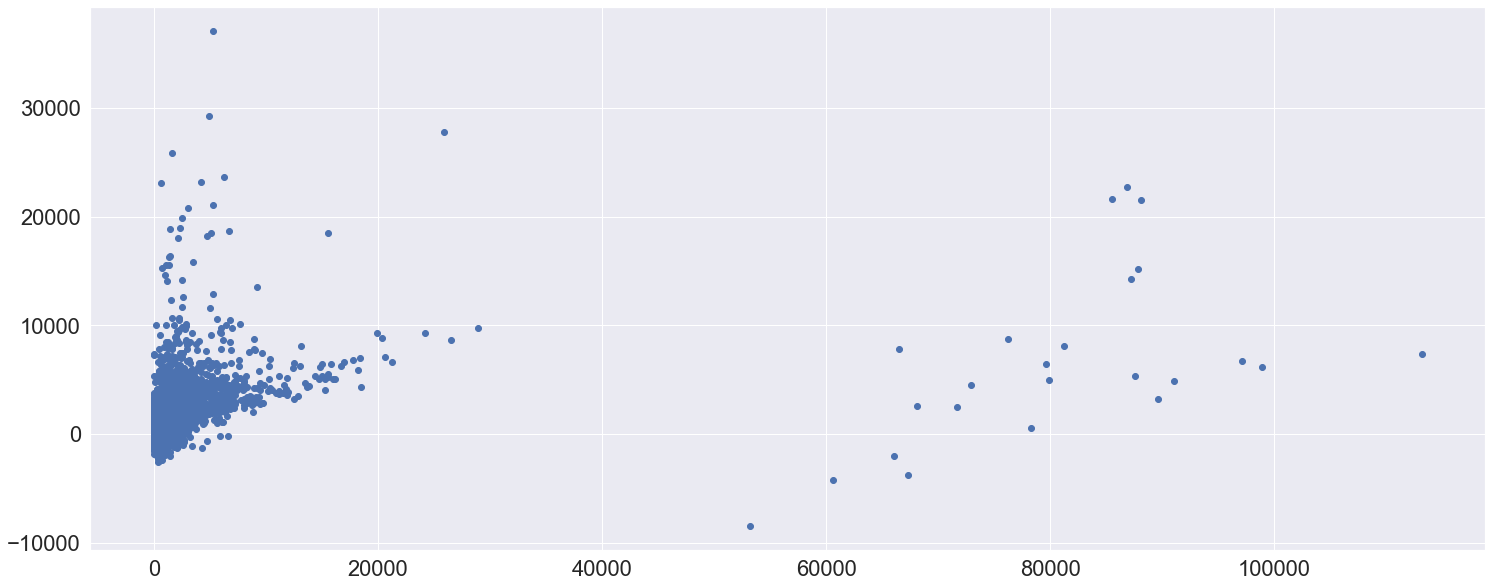

In [42]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

Metrics: 

In [43]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1004.4729724992318
MSE: 12719849.235101772


<IPython.core.display.Javascript object>

RMSE: 3566.4897637735867


# Polynomial Regression Model

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
X = all_data[['restaurant_id',
       'order_ack_hour', 
       'order_ready_hour', 'number_of_items', 'order_value_gbp',
       'price_per_item','DAY_NUMBER',
        'Time_bucket_Afternoon', 'Time_bucket_Evening',
       'Time_bucket_Morning', 'Price_Expensive', 'Price_Inexpensive',
       'Price_Moderately Expensive', 'Price_Very Expensive', 'Country_France',
       'Country_Germany', 'Country_Ireland', 'Country_UK']]

y = all_data['prep_time_seconds']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [48]:
model = PolynomialFeatures(degree= 4)
y_ = model.fit_transform(X)
X_test_ = model.fit_transform(X_test)
lg = LinearRegression()
lg.fit(y_,y)

LinearRegression()

In [49]:
predicted_data = lg.predict(X_test_)
predicted_data = np.round_(predicted_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

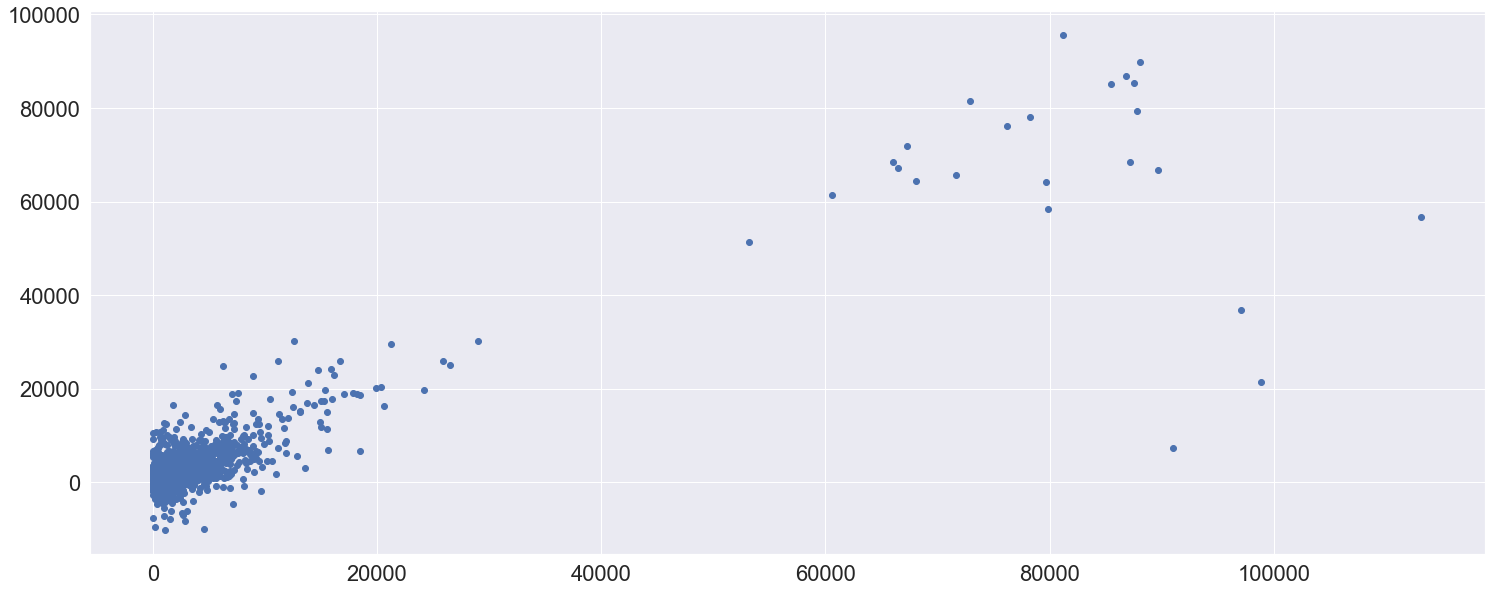

In [50]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predicted_data)

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted_data))
print('MSE:', metrics.mean_squared_error(y_test, predicted_data))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_data)))

MAE: 781.4599475227659
MSE: 3374976.8928847043


<IPython.core.display.Javascript object>

RMSE: 1837.1110181164076


# Training a Decision Tree Regressor model and running the model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

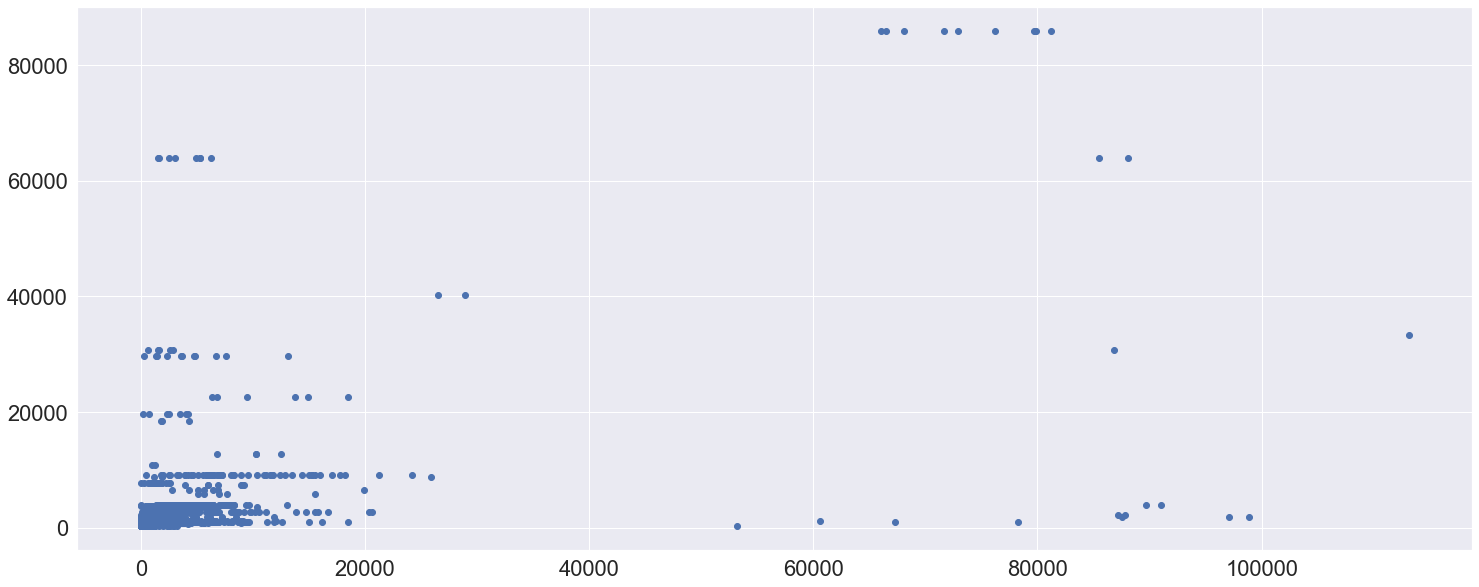

In [52]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_


# Training with best parameters
# from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(X_train,y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,y_pred);

Metrics

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 752.7491583385647
MSE: 11120114.697060188


<IPython.core.display.Javascript object>

RMSE: 3334.683597743598


# Training a Random Forest Regressor model and running the model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

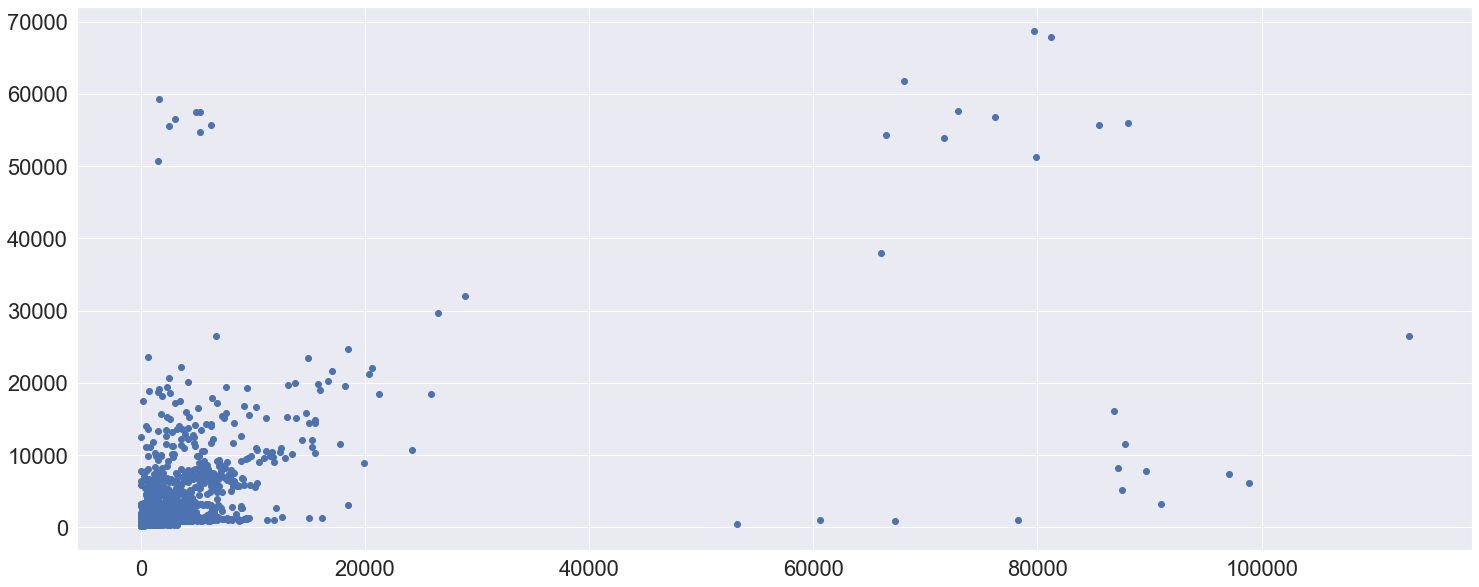

In [54]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_


RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train,y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,y_pred);

Metrics:

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 716.8244614549617
MSE: 9786093.557972522


<IPython.core.display.Javascript object>

RMSE: 3128.2732550038722


# Training a Ada Boost Regressor model using GRID SEARCH Cross Validation to find the optimum parameters and then running the model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

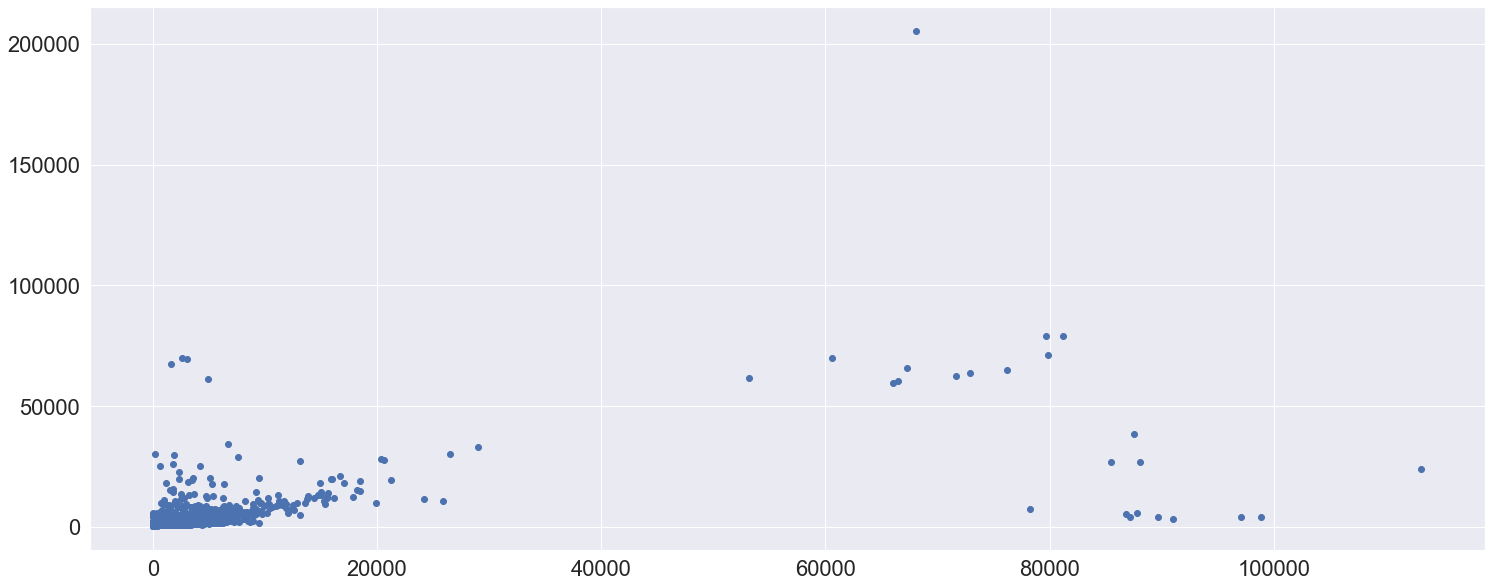

In [56]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=3)
gs_ar.fit(X_train,y_train)
c = gs_ar.best_params_

# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(X_train,y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,y_pred);

Metrics:

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 725.0948028756627
MSE: 9986463.1495034


<IPython.core.display.Javascript object>

RMSE: 3160.1365713372898


Discussions about the Machine learning algorithms used are explained in the .pdf document.